<a href="https://colab.research.google.com/github/ksak100/Temperature-and-pressure-prediction-using-LSTM/blob/main/Temperature_and_pressure_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.losses import MeanSquaredError as mse

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 0s 0us/step


In [ ]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
df=df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
df.index=pd.to_datetime(df["Date Time"], format='%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

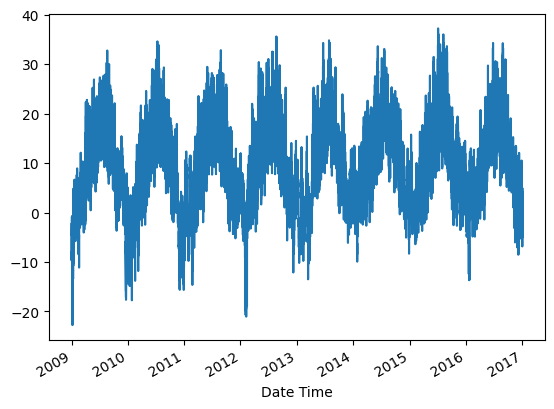

In [ ]:
temperature = df["T (degC)"]
#pressure=df["p (mbar)"]

temperature.plot()
#pressure.plot()

In [ ]:
#function for creating window
def window(df, window_size):
  df_array=df.to_numpy()
  X=[]
  Y=[]
  for i in range(len(df_array)-window_size):
    row=[[r] for r in df_array[i:i+window_size] ]
    X.append(row)
    label=df_array[i+window_size]
    Y.append(label)
  return np.array(X), np.array(Y)


In [ ]:
WINDOW_SIZE= 5
X1,Y1=window(temperature, WINDOW_SIZE)
X1.shape,Y1.shape


((70086, 5, 1), (70086,))

In [ ]:
X_train, y_train = X1[:60000], Y1[:60000]
X_val, y_val = X1[60000:65000], Y1[60000:65000]
X_test, y_test = X1[65000:], Y1[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [ ]:
from keras.src.engine.input_layer import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp=ModelCheckpoint('model/', save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])


Epoch 1/10
1875/1875 [==============================] - 24s 10ms/step - loss: 30.4864 - root_mean_squared_error: 5.5214 - val_loss: 0.9931 - val_root_mean_squared_error: 0.9966
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.5493 - root_mean_squared_error: 1.2447 - val_loss: 0.6208 - val_root_mean_squared_error: 0.7879
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.8688 - root_mean_squared_error: 0.9321 - val_loss: 0.5348 - val_root_mean_squared_error: 0.7313
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7208 - root_mean_squared_error: 0.8490 - val_loss: 0.5046 - val_root_mean_squared_error: 0.7104
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6811 - root_mean_squared_error: 0.8253 - val_loss: 0.5020 - val_root_mean_squared_error: 0.7085
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6680 - root_mean_squared_error: 0.8173 - val

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('model/')


In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results=pd.DataFrame({"Training Predictions": train_predictions, "Actual": y_train})
train_results

1875/1875 [==============================] - 13s 7ms/step


,Training Predictions,Actual
0,-9.880328,-9.67
1,-9.626812,-9.17
2,-8.751199,-8.10
3,-7.331160,-7.66
4,-7.300109,-7.04
...,...,...
59995,5.962011,6.07
59996,7.201030,9.88
59997,12.148682,13.53
59998,16.242205,15.43


In [ ]:
import matplotlib.pyplot as plt
def model_predict_plot(model, X, y, start=0, end=150):
  predictions = model.predict(X).flatten()
  results=pd.DataFrame({"Predictions": predictions, "Actuals": y})
  plt.plot(results["Actuals"][start:end], label="Actuals")
  plt.plot(results["Predictions"][start:end], label="Predictions")
  plt.legend()
  plt.show()

1875/1875 [==============================] - 5s 3ms/step


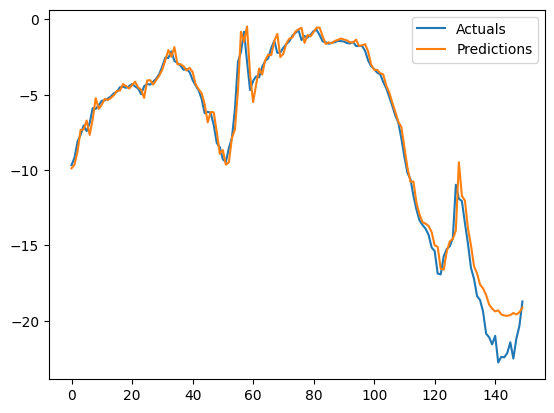

In [ ]:
model_predict_plot(model1, X_train, y_train)

157/157 [==============================] - 1s 3ms/step


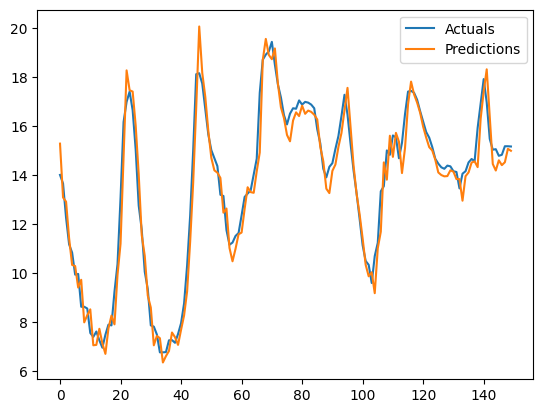

In [ ]:
model_predict_plot(model1, X_val, y_val)

159/159 [==============================] - 1s 4ms/step


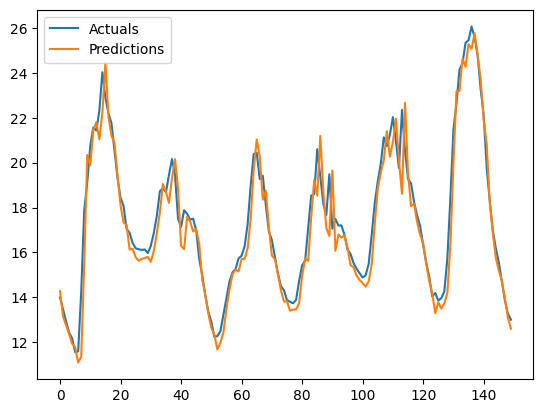

In [ ]:
model_predict_plot(model1, X_test, y_test)

Predicting two features Temperature and pressure

In [ ]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [ ]:
#Creating a new dataframe for temperature
temp_df=pd.DataFrame({"Temperature": temperature})

#Converting Date and time all to seconds
temp_df["Seconds"]=temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [ ]:
#As time is cyclic so using sine and cosine functions to make seconds cyclic in days and years

day=60*60*24
year=day*(365.2425)

temp_df["Day Sine"]=np.sin(temp_df["Seconds"]*(np.pi*2/day))
temp_df["Day Cosine"] = np.cos(temp_df["Seconds"]*(np.pi*2/day))
temp_df["Year Sine"] = np.sin(temp_df["Seconds"]*(np.pi*2/year))
temp_df["Year Cosine"] = np.cos(temp_df["Seconds"]*(np.pi*2/year))
temp_df

,Temperature,Seconds,Day Sine,Day Cosine,Year Sine,Year Cosine
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [ ]:
#Adding Pressure coloumn to the dataframe above
temp_df["Pressure"] = df["p (mbar)"]
temp_df.drop("Seconds", axis=1, inplace=True)

In [ ]:
temp_df

,Temperature,Day Sine,Day Cosine,Year Sine,Year Cosine,Pressure
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950,996.50
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942,996.62
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934,996.84
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926,996.99
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917,997.46
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976,1002.18
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971,1001.40
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965,1001.19


In [ ]:
#function for creating window
def window1(df, window_size=6):
  df_array=df.to_numpy()
  X=[]
  Y=[]
  for i in range(len(df_array)-window_size):
    row=[r for r in df_array[i:i+window_size] ]
    X.append(row)
    label=[df_array[i+window_size][0], df_array[i+window_size][-1]]
    Y.append(label)
  return np.array(X), np.array(Y)


In [ ]:
Window_size=6
X2,Y2=window1(temp_df, Window_size)
X2.shape,Y2.shape

((70085, 6, 6), (70085, 2))

In [ ]:
X_train2, y_train2 = X2[:60000], Y2[:60000]
X_val2, y_val2 = X2[60000:65000], Y2[60000:65000]
X_test2, y_test2 = X2[65000:], Y2[65000:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((60000, 6, 6), (60000, 2), (5000, 6, 6), (5000, 2), (5085, 6, 6), (5085, 2))

In [ ]:
X_train2

array([[[-8.05000000e+00,  2.58819045e-01,  9.65925826e-01,
          1.00491198e-02,  9.99949506e-01,  9.96500000e+02],
        [-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01,  9.96620000e+02],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01,  9.96840000e+02],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01,  9.96990000e+02],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
          1.29160593e-02,  9.99916584e-01,  9.97460000e+02],
        [-9.67000000e+00,  1.00000000e+00,  4.33995489e-12,
          1.36327785e-02,  9.99907069e-01,  9.97710000e+02]],

       [[-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01,  9.96620000e+02],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01,  9.96840000e+02],
        [-9.05000000e+00,  8.6

In [ ]:
#lets create a function to normalise data of temperature and pressure

#Lets find out mean and standard deviation of temperature and pressure
pressure_mean=np.mean(X_train2[:,:,-1])
pressure_std=np.std(X_train2[:,:,-1])

temp_mean=np.mean(X_train2[:,:,0])
temp_std=np.std(X_train2[:,:,0])

def Standardize_training(X):
  X[:,:,0]=(X[:,:,0]-temp_mean)/temp_std
  X[:,:,-1]=(X[:,:,-1]-pressure_mean)/pressure_std
  return X

def Standardize_output(y):
  y[:,0]=(y[:,0]-temp_mean)/temp_std
  y[:,1]=(y[:,1]-pressure_mean)/pressure_std
  return y

In [ ]:
Standardize_training(X_train2)
Standardize_training(X_val2)
Standardize_training(X_test2)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01, -1.07355684e+00],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01, -1.00807491e+00],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01, -9.51081386e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01, -9.14702539e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01, -8.80748948e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01, -8.29818561e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01, -1.00807491e+00],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01, -9.51081386e-01],
        [ 7.55664851e-01, -5.0

In [ ]:
Standardize_output(y_train2)
Standardize_output(y_val2)
Standardize_output(y_test2)

array([[ 0.47475866, -0.80192811],
       [ 0.41246565, -0.79343971],
       [ 0.35369867, -0.76312401],
       ...,
       [-1.43046702,  1.48145088],
       [-1.44692178,  1.41596895],
       [-1.56915711,  1.35048703]])

In [ ]:
model2 = Sequential()
model2.add(InputLayer((6,6)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(2, 'linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2=ModelCheckpoint("model2/", save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0052 - root_mean_squared_error: 0.0721 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0606
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_l

In [ ]:
def model_predict_plot2(model, X, y, start=0, end=150):
  predictions = model.predict(X)
  temperature_pred, pressure_pred=predictions[:,0], predictions[:,1]
  temperature_actual, pressure_actual=y[:,0], y[:,1]
  results=pd.DataFrame(data={"Predictions Temperature": temperature_pred, "Actual Temperature": temperature_actual, "Predictions Pressure": pressure_pred, "Actual Pressure": pressure_actual})
  plt.plot(results["Actual Temperature"][start:end], label="Actuals Temperature")
  plt.plot(results["Predictions Temperature"][start:end], label="Predictions Temperature")
  plt.plot(results["Actual Pressure"][start:end], label="Actuals Pressure")
  plt.plot(results["Predictions Pressure"][start:end], label="Predictions Pressure")
  plt.legend()
  plt.show()

159/159 [==============================] - 0s 3ms/step


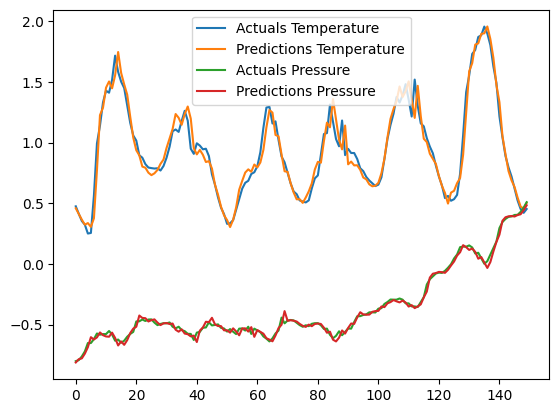

In [ ]:
model_predict_plot2(model2, X_test2, y_test2)